**Data Science And Business Analytics tasks**

---



**Author**: Ben Mansour Houcem Eddine


---



**TASK 1: Predict the percentage of an student based on the no. of study hours**

**import libraries**

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

**read the data**

In [3]:
data= pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**data preprocessing**

In [25]:
print(data.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [26]:
# count the number of nan values in each column
print(data.isnull().sum())

Hours     0
Scores    0
dtype: int64


**Plotting The variation of scores in hours study**

<Figure size 1080x72 with 0 Axes>

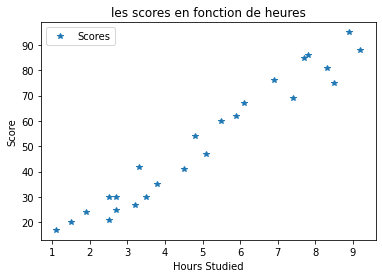

In [ ]:
fig = plt.figure(figsize=(15,1))
data.plot(x='Hours', y='Scores', style='*')  
plt.title('les scores en fonction de heures')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score')  
plt.show()

**here i create two variable hours and scores** 


---


**hours** contain column hours 


---


**scores** contain column scores

In [4]:
hours=data['Hours']
scores=data['Scores']

**transform the two variable into array X for data and Y for label**

In [5]:
X=np.array(hours)
Y=np.array(scores)

In [ ]:
X

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

In [ ]:
  Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

**As we can see here the X and Y variable are in Row now we will put them in column using reshape**

In [6]:
X=X.reshape(-1,1)
Y=Y.reshape(-1,1)

In [ ]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

**here we will split dataset into train and test 2/3 train 1/3 test**

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                            test_size=0.33, random_state=0) 

**now we applied the simple linearRegression algorithme to train the model because we have one variable hours**

In [9]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#using time library to chek the time nedded the algorithme to train 
import time
debut=time.time()
model.fit(X_train,y_train)
fin=time.time()-debut
print("the time nedded to finish the train is ",fin,"s")

the time nedded to finish the train is  0.013167858123779297 s


**Now we will create two variable a and b** 

---
**a**: for model.coef_ 

---
**b**: for .intercept_



#y=ax+b

In [10]:
a=model.coef_ 
print(a)

b=model.intercept_
print(b)

[[9.69062469]]
[2.50695476]


**Now we will make prediction using X_test**

In [11]:
pred=model.predict(X_test)
pred

array([[17.04289179],
       [33.51695377],
       [74.21757747],
       [26.73351648],
       [59.68164043],
       [39.33132858],
       [20.91914167],
       [78.09382734],
       [69.37226512]])

In [12]:
# Comparing between y_actual and y_pred
df = np.concatenate((y_test,pred),axis=1)
df=pd.DataFrame(df)
df. rename(columns = {0:'y_actual', 1:'y_pred'}, inplace = True)
print(df) 

   y_actual     y_pred
0      20.0  17.042892
1      27.0  33.516954
2      69.0  74.217577
3      30.0  26.733516
4      62.0  59.681640
5      35.0  39.331329
6      24.0  20.919142
7      86.0  78.093827
8      76.0  69.372265


after prediction we will calculate the error using RMSE metrics

In [13]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,pred)
import math
print('RMSE', math.sqrt(mse))


RMSE 5.046115410711748


Now we use EV to calculate the accuracy of the model

In [14]:
from sklearn.metrics import explained_variance_score
EV=explained_variance_score(y_test, pred)
print("Explained variance: %f" % (EV*100))

Explained variance: 95.776355


here i create a line using pred1=a*X+b

In [20]:
pred1=a*X+b

In [21]:
pred1

array([[26.73351648],
       [51.92914068],
       [33.51695377],
       [84.87726463],
       [36.42414117],
       [17.04289179],
       [91.66070191],
       [55.80539056],
       [82.93913969],
       [28.67164142],
       [77.12476487],
       [59.68164043],
       [46.11476586],
       [34.48601624],
       [13.16664192],
       [88.7535145 ],
       [26.73351648],
       [20.91914167],
       [61.61976537],
       [74.21757747],
       [28.67164142],
       [49.02195327],
       [39.33132858],
       [69.37226512],
       [78.09382734]])

Text(0, 0.5, 'scores')

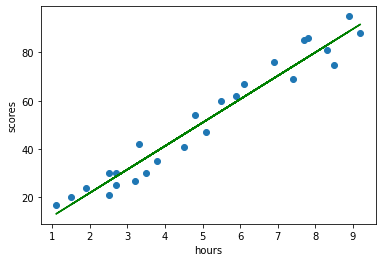

In [22]:
plt.scatter(X,Y)
plt.plot(X,pred1,color="green")
plt.xlabel("hours")
plt.ylabel("scores")

**Finnaly we predicted the score if a student studies for 9.25 hrs/day**

In [23]:
result=model.predict([[9.25]])

In [24]:
print("the predicted predicted score if a student studies for 9.25 hrs/day is",result[0][0])

the predicted predicted score if a student studies for 9.25 hrs/day is 92.14523314523316


#***Hope you enjoy it***
